In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [62]:
pd1 = pd.read_csv('AllTNOs1_prop_elem_multi.csv')
pd2 = pd.read_csv('AllTNOs2_prop_elem_multi.csv')

pdfull = pd.concat([pd1,pd2],ignore_index=True)

ind1 = np.where(pdfull['PropSMA'] > 35)
ind2 = np.where(pdfull['PropSMA'] < 80)
#ind2 = np.where((1-pdfull['PropEcc'])*pdfull['PropSMA'] < 100)
ind3 = np.where(pdfull['PropEcc'] != 0)
ind4 = np.where(pdfull['PropEcc'] < 1)
ind = np.intersect1d(ind1,ind2)
ind = np.intersect1d(ind,ind3)
ind = np.intersect1d(ind,ind4)

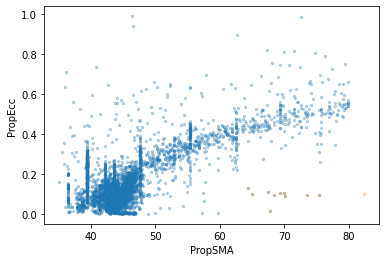

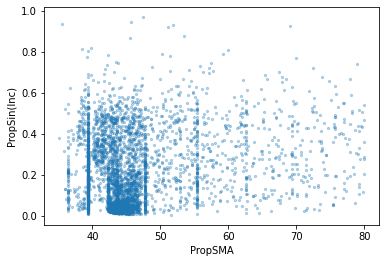

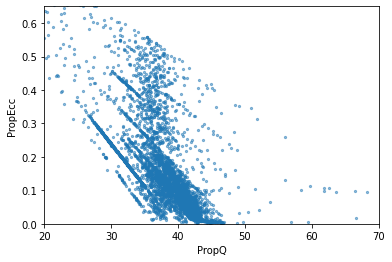

[ 144  313 2098 2107 2296 2319 2325 2326 2343 2346 2347]


In [99]:
indt1 = np.where(pdfull['PropEcc'] < 0.15)
indt2 = np.where(pdfull['PropSMA'] > 60)
indt3 = np.where(pdfull['PropSMA'] < 85)
indt = np.intersect1d(indt1,indt2)
indt = np.intersect1d(indt,indt3)
plt.scatter(pdfull['PropSMA'][ind],pdfull['PropEcc'][ind],s=5,alpha=0.3)
plt.scatter(pdfull['PropSMA'][indt],pdfull['PropEcc'][indt],s=5,alpha=0.3)
plt.xlabel('PropSMA')
plt.ylabel('PropEcc')
plt.show()
plt.scatter(pdfull['PropSMA'][ind],pdfull['PropSin(Inc)'][ind],s=5,alpha=0.3)
plt.xlabel('PropSMA')
plt.ylabel('PropSin(Inc)')
plt.show()
plt.scatter((1-pdfull['PropEcc'][ind])*pdfull['PropSMA'][ind],pdfull['PropEcc'][ind],s=5,alpha=0.5)
plt.xlabel('PropQ')
plt.ylabel('PropEcc')
plt.xlim(20,70)
plt.ylim(0,0.65)
#plt.scatter((1-pdfull['PropEcc'][2604])*pdfull['PropSMA'][2604],pdfull['PropEcc'][2604],s=5,alpha=1)
plt.show()
print(indt)

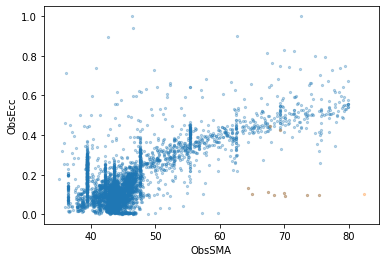

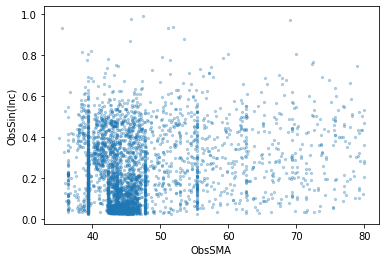

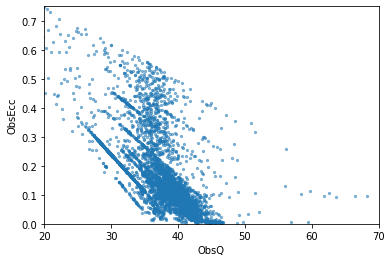

In [83]:
plt.scatter(pdfull['ObsSMA'][ind],pdfull['ObsEcc'][ind],s=5,alpha=0.3)
plt.scatter(pdfull['ObsSMA'][indt],pdfull['ObsEcc'][indt],s=5,alpha=0.3)
plt.xlabel('ObsSMA')
plt.ylabel('ObsEcc')
plt.show()
plt.scatter(pdfull['ObsSMA'][ind],pdfull['ObsSin(Inc)'][ind],s=5,alpha=0.3)
plt.xlabel('ObsSMA')
plt.ylabel('ObsSin(Inc)')
plt.show()
plt.scatter((1-pdfull['ObsEcc'][ind])*pdfull['ObsSMA'][ind],pdfull['ObsEcc'][ind],s=5,alpha=0.5)
plt.xlim(20,70)
plt.ylim(0,0.75)
plt.xlabel('ObsQ')
plt.ylabel('ObsEcc')
#plt.scatter((1-pdfull['ObsEcc'][2604])*pdfull['ObsSMA'][2604],pdfull['ObsEcc'][2604],s=50,alpha=1)
plt.show()


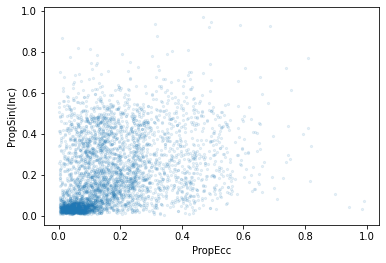

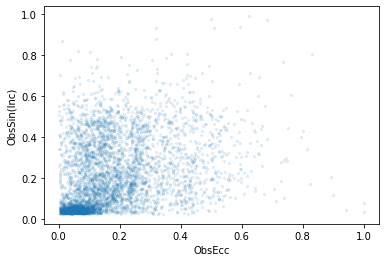

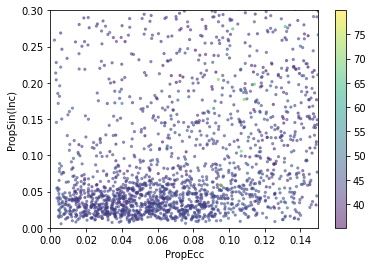

0        44.30
1        39.75
2        39.82
3        43.55
4        42.11
         ...  
5055     88.39
5056     85.76
5057    247.00
5058     57.99
5059     53.91
Name: a, Length: 5060, dtype: float64


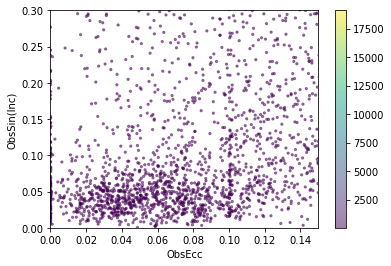

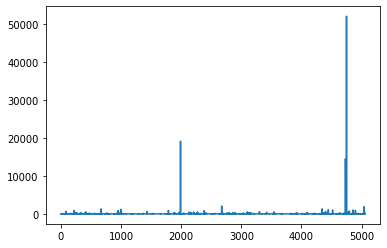

In [98]:
plt.scatter(pdfull['PropEcc'][ind],pdfull['PropSin(Inc)'][ind],s=5,alpha=0.1)
plt.xlabel('PropEcc')
plt.ylabel('PropSin(Inc)')
plt.show()
plt.scatter(pdfull['ObsEcc'][ind],pdfull['ObsSin(Inc)'][ind],s=5,alpha=0.1)
plt.xlabel('ObsEcc')
plt.ylabel('ObsSin(Inc)')
plt.show()

plt.scatter(pdfull['PropEcc'][ind],pdfull['PropSin(Inc)'][ind],s=5,alpha=0.5,c=pdfull['PropSMA'][ind])
plt.colorbar()
plt.xlabel('PropEcc')
plt.ylabel('PropSin(Inc)')
plt.xlim(0,0.15)
plt.ylim(0,0.3)
plt.show()
cat = pd.read_csv('../data_files/AllTNOs.csv')
print(cat['a'])
plt.scatter(cat['e'][ind],np.sin(cat['i'][ind]/180*np.pi),s=5,alpha=0.5,c=cat['a'][ind])
plt.xlabel('ObsEcc')
plt.colorbar()
plt.ylabel('ObsSin(Inc)')
plt.xlim(0,0.15)
plt.ylim(0,0.3)
plt.show()
plt.plot(cat['a'])

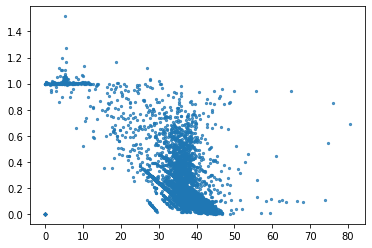

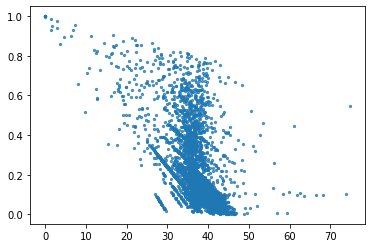

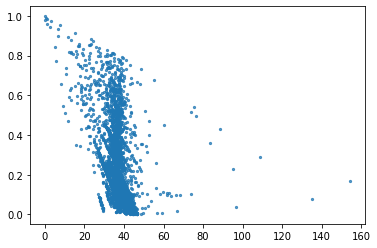

In [75]:
indpos = np.where(pdfull['PropSMA'] > 0)[0]
indpos2 = np.where(pdfull['PropSMA'] < 200)[0]
indpos = np.intersect1d(indpos,indpos2)

plt.scatter((1-pdfull['ObsEcc'])*pdfull['ObsSMA'],pdfull['ObsEcc'],s=5,alpha=0.75)
#plt.scatter((1-pdfull['ObsEcc'][2604])*pdfull['ObsSMA'][2604],pdfull['ObsEcc'][2604],s=50,alpha=1)
plt.show()

plt.scatter((1-pdfull['ObsEcc'][indpos])*pdfull['ObsSMA'][indpos],pdfull['ObsEcc'][indpos],s=5,alpha=0.75)
#plt.scatter((1-pdfull['ObsEcc'][2604])*pdfull['ObsSMA'][2604],pdfull['ObsEcc'][2604],s=50,alpha=1)
plt.show()

plt.scatter((1-pdfull['PropEcc'][indpos])*pdfull['PropSMA'][indpos],pdfull['PropEcc'][indpos],s=5,alpha=0.75)
#plt.scatter((1-pdfull['ObsEcc'][2604])*pdfull['ObsSMA'][2604],pdfull['ObsEcc'][2604],s=50,alpha=1)
plt.show()

In [33]:
import rebound
#print(pdfull.iloc[indt])
file = '/../../../hdd/haumea-data/djspenc/SBDynT_sims/AllTNOs1'
#file = '/'
objname = '2022 LT14'
print(os.listdir(file+'/'+objname))
s = rebound.Simulationarchive(file+'/'+objname+'/archive.bin')

a=np.zeros(len(s))
e=np.zeros(len(s))
inc=np.zeros(len(s))
t=np.zeros(len(s))

for i in range(len(s)):
    t[i] = s[i].t
    a[i] = s[i].particles[-1].a
    e[i] = s[i].particles[-1].e
    inc[i] = s[i].particles[-1].inc

['archive_init.bin', 'archive.bin']


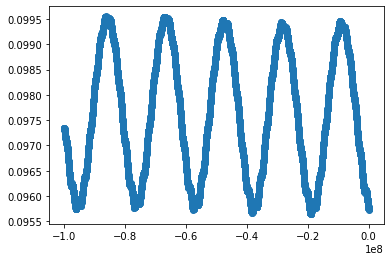

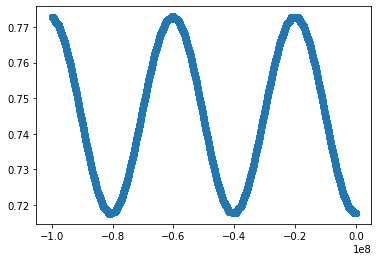

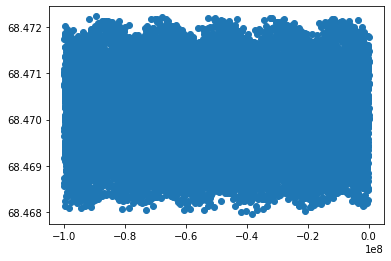

In [35]:
plt.scatter(t,e)
plt.show()
plt.scatter(t,inc)
plt.show()
plt.scatter(t,a)
plt.show()

In [40]:
print(np.where(pdfull['Objname'] == '2012 VP113'))

(array([2604]),)
